In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model


In [126]:
houses = pd.read_csv("kc_house_data.csv")
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [79]:
houses.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

id              -0.016762
price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64


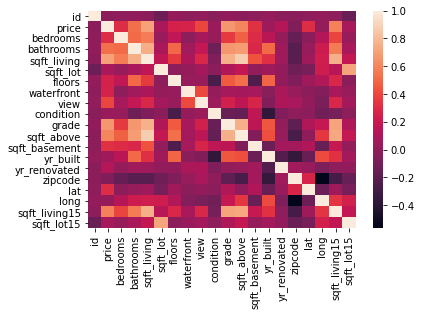

In [80]:
corr = houses.corr()
sns.heatmap(corr)
print(corr['price'])

In [81]:
feature_cols=(corr['price'].to_dict())
# print(feature_cols)
feature_cols=dict(sorted(feature_cols.items(), key=lambda item: item[1],reverse=True))
feature_cols.pop('price')
print(feature_cols)

{'sqft_living': 0.7020350546118009, 'grade': 0.667434256020255, 'sqft_above': 0.6055672983560842, 'sqft_living15': 0.5853789035795697, 'bathrooms': 0.5251375054139724, 'view': 0.3972934882944871, 'sqft_basement': 0.323816020712004, 'bedrooms': 0.3083495981456364, 'lat': 0.307003479995218, 'waterfront': 0.26636943403055346, 'floors': 0.25679388755070176, 'yr_renovated': 0.12643379344092243, 'sqft_lot': 0.08966086058710003, 'sqft_lot15': 0.08244715251948594, 'yr_built': 0.05401153149478604, 'condition': 0.03636178912899409, 'long': 0.02162624103930622, 'id': -0.016762196614445113, 'zipcode': -0.05320285429832495}


In [82]:
model = smf.ols('sqft_living ~ price', data=houses).fit()
print(model.summary())
print(model.pvalues)

                            OLS Regression Results                            
Dep. Variable:            sqft_living   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Thu, 11 Mar 2021   Prob (F-statistic):               0.00
Time:                        07:30:44   Log-Likelihood:            -1.7079e+05
No. Observations:               21613   AIC:                         3.416e+05
Df Residuals:                   21611   BIC:                         3.416e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1131.3544      7.914    142.952      0.0

In [127]:
feature_cols = ['sqft_living','grade','sqft_above','sqft_living15','bathrooms','floors']
test=houses[0:5]
x = houses[feature_cols]
y = houses.price

In [128]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.2) 

## New section

In [151]:
def run_linearRegression():
    linreg = LinearRegression()
    linreg.fit(x_train, y_train)
    mse=mean_squared_error(linreg.predict(x_test),y_test)
    # coef=linreg.coef_
    # interc=linreg.intercept_
    # print("parameters/weights/slope and intercept")
    # print(coef+" = m")
    # print(interc+" = c")

    yhat = linreg.predict(x_train)
    SS_Residual = sum((y_train-yhat)**2)       
    SS_Total = sum((y_train-np.mean(y_train))**2)     
    r_squared = 1 - (float(SS_Residual))/SS_Total
    adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)

    print("adjusted r_square for train")
    print(adjusted_r_squared)

    print(np.sqrt(mse))
    print(abs(linreg.score(x_test,y_test)))
    mse=mean_squared_error(linreg.predict(x_train),y_train)
    print(np.sqrt(mse))
    print(abs(linreg.score(x_train,y_train)))

In [154]:
run_linearRegression()
print(linreg.coef_)
print(linreg.intercept_)

adjusted r_square for train
0.5467189566648718
261733.66186105635
0.5511004354267612
248604.7836785977
0.5468762639851346
[ 2.43647694e+02  1.12795729e+05 -7.84611398e+01  2.36905809e+01
 -3.57323058e+04 -3.69767522e+03]
-655229.1626020859


In [102]:
def run_bayesianRidge():
    reg = linear_model.BayesianRidge()
    reg.fit(x_train,y_train)

    mse=mean_squared_error(reg.predict(x_test),y_test)
    print(np.sqrt(mse))
    print(abs(reg.score(x_test,y_test)))
    mse=mean_squared_error(reg.predict(x_train),y_train)
    print(np.sqrt(mse))
    print(abs(reg.score(x_train,y_train)))

In [88]:
run_bayesianRidge()

248484.623669206
0.4896175279787408
249328.35349927453
0.5492624521345149


In [98]:
enc=LabelEncoder()
values=(x_train['floors'])
# print(houses['floors'])
integer_encoded = enc.fit_transform(values)
print(integer_encoded)
print(x_train['floors'])
x_train=x_train.drop(['floors'],axis=1)
x_train.insert(3,'floors',integer_encoded,allow_duplicates=True)

[4 0 0 ... 0 2 0]
4486     3.0
15148    1.0
6064     1.0
7984     1.0
4601     1.0
        ... 
4904     2.0
15895    2.0
329      1.0
20984    2.0
981      1.0
Name: floors, Length: 17290, dtype: float64


In [99]:
print(x_train.columns)

Index(['sqft_living', 'grade', 'sqft_above', 'floors', 'sqft_living15',
       'bathrooms'],
      dtype='object')


In [121]:
run_linearRegression()
print('\n')
run_bayesianRidge()

ValueError: ignored

# Gradient Descent

In [113]:
def get_data(data,features, output):
    data['constant'] = 1
    features = ['constant'] + features

    features_new = data[features]
    feature_matrix = np.asarray(features_new)
    
    output_data = data[output]
    output_array = output_data.to_numpy()
    return(feature_matrix,output_array)
    
def prediction(feature_matrix, weights):
    predictions = np.dot(feature_matrix,weights)
    return(predictions)

def feature_derivative(errors,feature):
    derivative = 2*(np.dot(errors,feature))
    return(derivative)
def regression_gradient_descent(feature_matrix, output, initial_weights, step_size, tolerance):
    converged = False
    weights = np.array(initial_weights)
    while not converged:
        predictions = prediction(feature_matrix,weights)
        
        errors = predictions - output
        
        gradient_sum_squares = 0
        for i in range(len(weights)):
            derivative = feature_derivative(errors,feature_matrix[:,i])
            
            gradient_sum_squares = derivative**2 + gradient_sum_squares
            
            # subtract the step size times the derivative from the current weight
            weights = weights - step_size*(derivative)
            
            gradient_magnitude = np.sqrt(gradient_sum_squares)
            if gradient_magnitude < tolerance:
                converged = True
    return(weights)  


In [114]:
(feature_matrix,output_array) = get_data(houses, ['sqft_living'],'price')
initial_weights = np.array([-47000., 1.])
predictions = prediction(feature_matrix, initial_weights)
errors = output_array - predictions
step_size = 7e-12
tolerance = 2.5e7
weights = regression_gradient_descent(feature_matrix, output_array, initial_weights, step_size, tolerance)

In [115]:
print(weights)

[-46719.20958436    281.79041564]


In [119]:
(feature_matrix_test,output_array_test) = get_data(test, ['sqft_living'],'price')
prediction_test = prediction(feature_matrix_test, weights)
errors = output_array_test - prediction_test
RSS_simple_GD = np.sum((errors)**2)
print("RSS_simple_GD: ", np.sum((errors)**2))

RSS_simple_GD:  40257830247.25434


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
